Classes for Outlook: ['Overcast' 'Rain' 'Sunny']
Encoded values for Outlook: [2 0 1]

Classes for Temperature: ['Cool' 'Hot' 'Mild']
Encoded values for Temperature: [1 2 0]

Classes for Humidity: ['High' 'Normal']
Encoded values for Humidity: [0 1]

Classes for Wind: ['Strong' 'Weak']
Encoded values for Wind: [1 0]



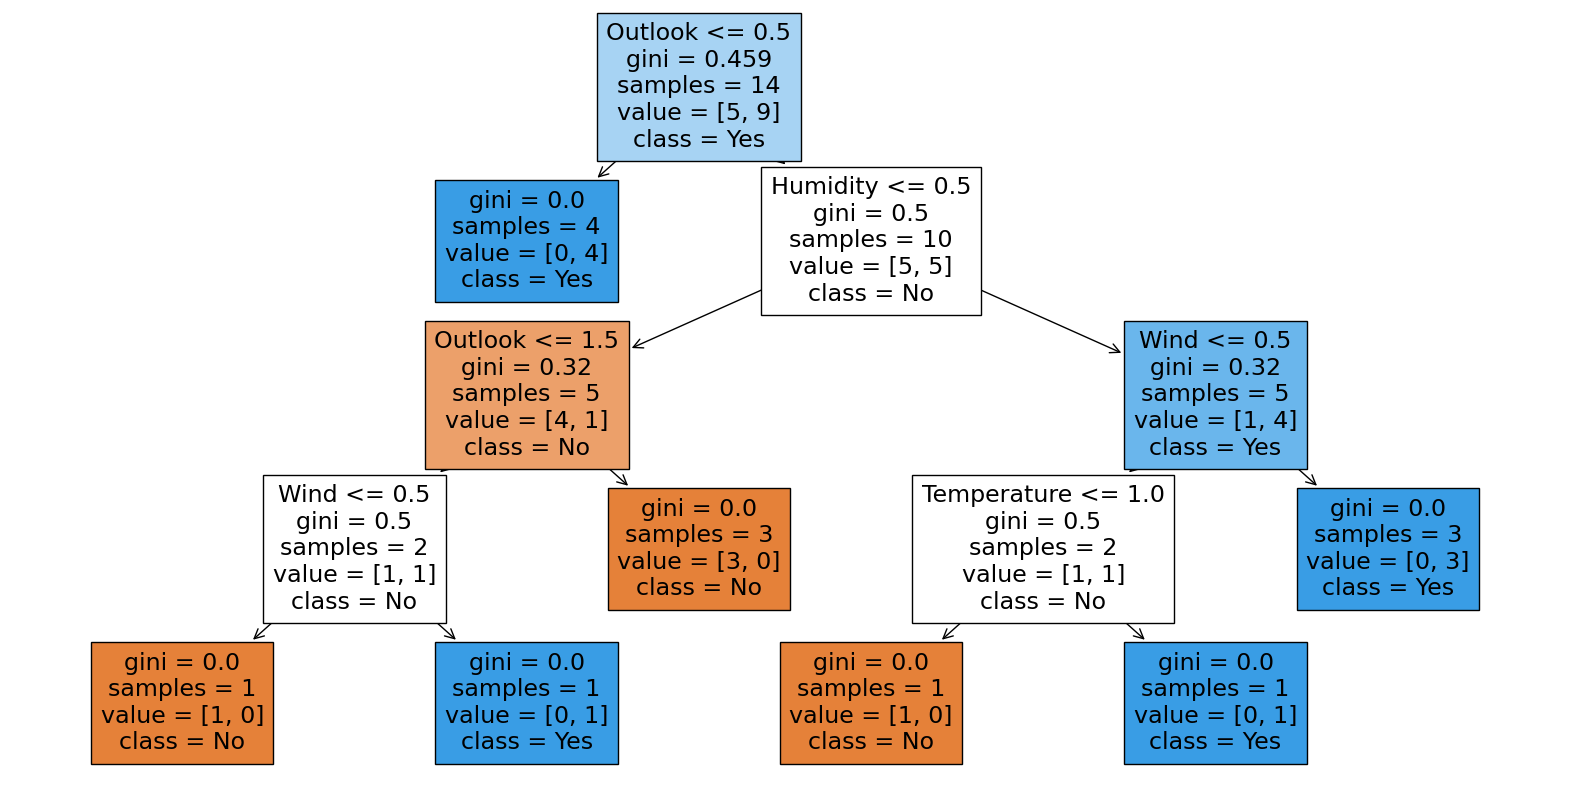

|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- Wind <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Wind >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Outlook >  1.50
|   |   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- Wind <= 0.50
|   |   |   |--- Temperature <= 1.00
|   |   |   |   |--- class: 0
|   |   |   |--- Temperature >  1.00
|   |   |   |   |--- class: 1
|   |   |--- Wind >  0.50
|   |   |   |--- class: 1



In [1]:
#These are all the important libaries that I need for this assignment.

import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame from a CSV file located in my assignment 6 folder on my machine
df = pd.read_csv('Lab6_Dataset.csv')

# Initialize a LabelEncoder, which will be used to convert categorical variables to numeric. 
#Sir use a manual example in class, this automate the process.
label_encoder = LabelEncoder()

# Define a list of column names in the DataFrame that contain categorical data.
features_to_encode = ['Outlook', 'Temperature', 'Humidity', 'Wind']

# Loop through each categorical feature to encode it into numeric values.
# This is necessary because most machine learning algorithms (including decision trees)
# require numerical input.
for feature in features_to_encode:
    # The fit_transform() method first fits the label encoder to the data (learning how to map
    # each category to a number) and then transforms the data into those numbers.
    df[feature] = label_encoder.fit_transform(df[feature])
    
    # Print out the mapping from categorical feature names to the encoded numeric values.
    # This is useful for reference so you know what numbers correspond to what categories.
    print(f"Classes for {feature}: {label_encoder.classes_}")
    print(f"Encoded values for {feature}: {df[feature].unique()}\n")

# The target variable 'Play' is being converted from Yes/No to 1/0.
play_mapping = {'Yes': 1, 'No': 0}
df['Play'] = df['Play'].map(play_mapping)

# Define the features (independent variables) and the target (dependent variable) for the
# decision tree algorithm.
X = df[features_to_encode]  # Features (the predictors)
y = df['Play']              # Target variable (what we want to predict)

# Initialize a DecisionTreeClassifier object with a random_state for reproducibility,
# then fit it to the features and target variable. This 'trains' the model.
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X, y)

# Set up the plot size for the decision tree visualization.
plt.figure(figsize=(20, 10))
# Plot the trained decision tree with annotations and filled colors.
# 'feature_names' are the names of the features that are used as decision nodes,
# 'class_names' are the names of the classes in the target variable.
plot_tree(dtree, feature_names=features_to_encode, class_names=['No', 'Yes'], filled=True)
# Display the tree plot. In a Jupyter notebook, this will show the plot inline.
plt.show()

# Generate a textual representation of the decision tree showing the structure and the
# decisions at each node.
text_representation = export_text(dtree, feature_names=features_to_encode)
# Print the textual representation of the decision tree to the console.
print(text_representation)
